## Ejercicio 6.43
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_6.43.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

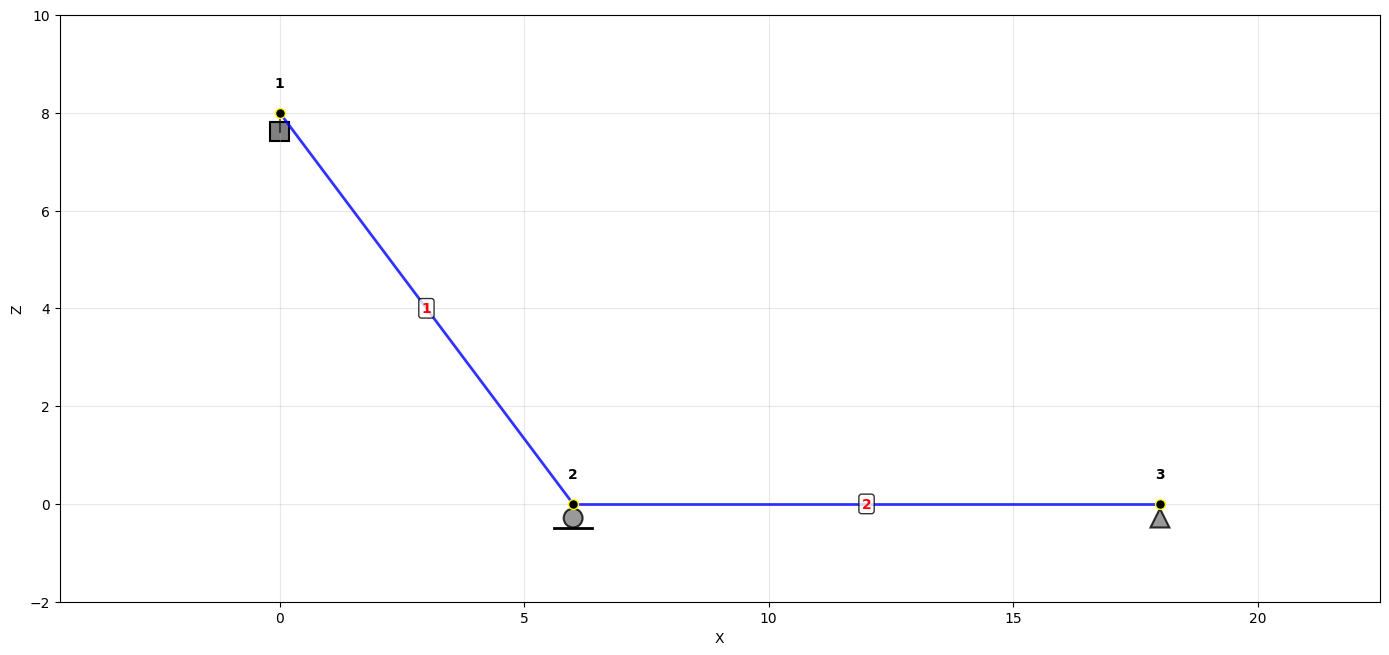

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 13000 * 10**-6
I = 762 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=8)
system.defineNode(2, x=6, z=0)
system.defineNode(3, x=18, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(2, fx=0, fz=0, my=-150)
system.assignElement.pointForce(1, P=125, distance=0.5)
system.assignElement.uniformLoad(2, w=24)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 7 de 9
GL restringidos: [0 1 2 4 6 7 8]
Grados de libertad libres (fuerzas conocidas): 2 de 9
GL libres: [3 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (2x2):
  |         3 |          5 |

  |     311437 |      -7315 |
  |      -7315 |      99060 |
 
KAB (2x7):
  |         0 |          1 |          2 |          4 |          6 |          7 |          8 |
 
  |     -94770 |     123922 |      -7315 |    -123922 |    -216667 |          0 |          0 |
  |       7315 |       5486 |      30480 |      -2311 |          0 |      

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 10.000
  Área (A): 1.3000e-02
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 7.6200e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=0.600 | S=-0.800

CARGAS APLICADAS:
  1) Fuerza puntual: P=125.000 a 5.0 del nodo i

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      0.600 |     -0.800 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.800 |      0.600 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.600 |     -0.800 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.800 |      0.600 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 260000.000 |      0.000 |      0.000 | -260000.000 |      0.000 |      0.000 |
  |      0.000 |   1828.800 |   9144.000 |      0.000 |  -

In [5]:
system.getInfoNodes()

Node 1: (0, 8) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=43.244, Fz=-18.648, My=26.577

Node 2: (6, 0) - Móvil en X
  Desplazamientos: Ux=-2.6195e-04, Uz=0.0000e+00, Ry=-4.3172e-03
  Fuerzas: Fx=0.000, Fz=259.941, My=-150.000

Node 3: (18, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=7.8279e-03
  Fuerzas: Fx=56.756, Fz=121.707, My=0.000


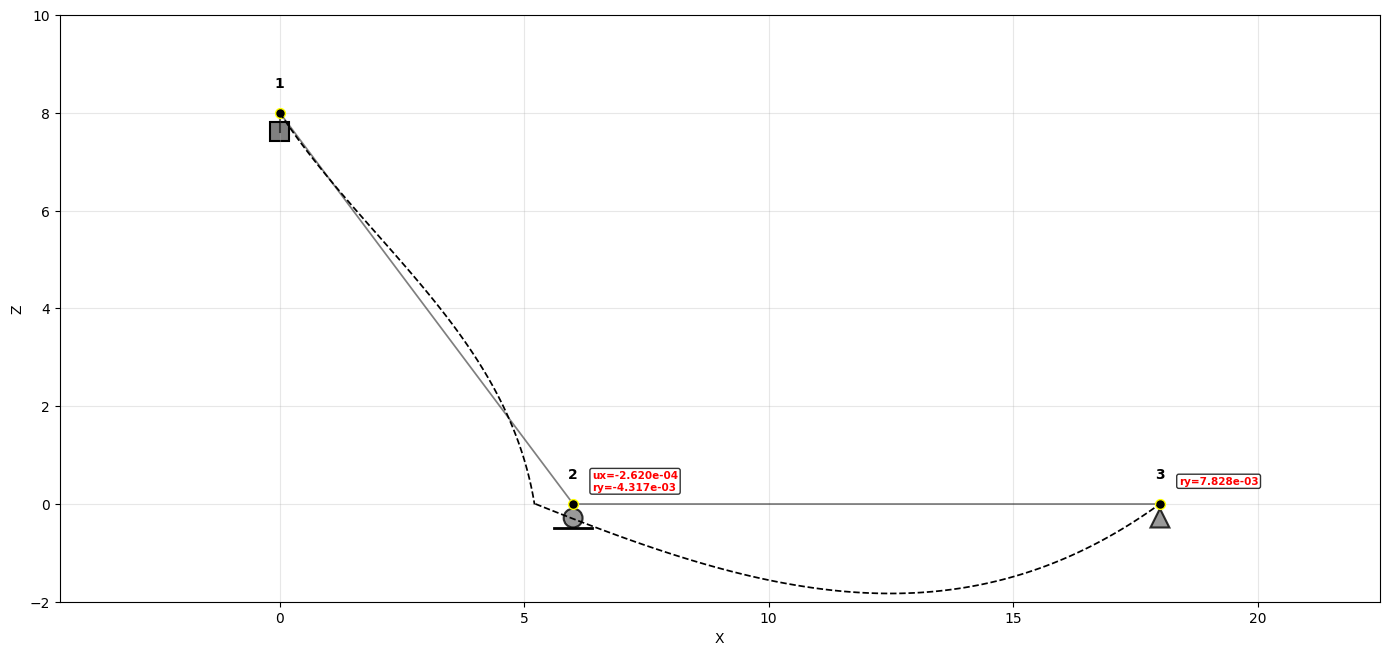

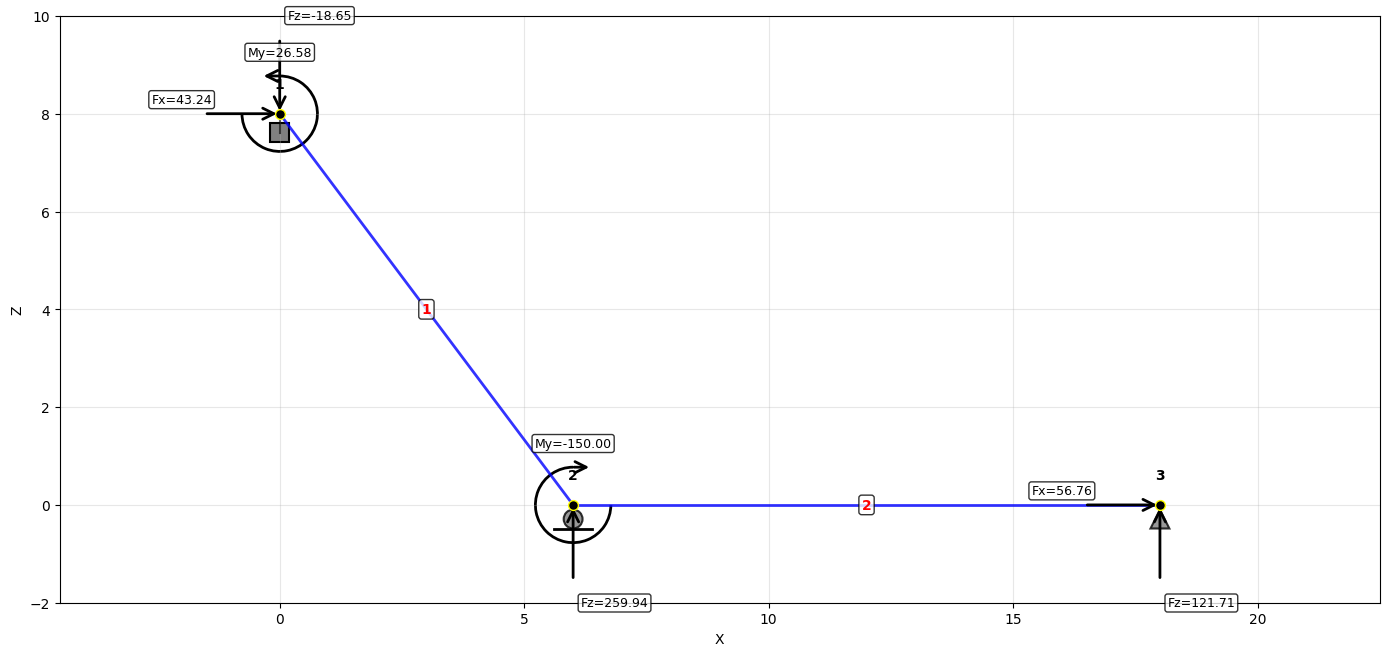

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.5)
plotter.showReactions()

## Comprobación con SAP2000
![NON](img/ejercicio_6.43_sap.png)